**CONEXIÓN CON DRIVE**

---
---

In [ ]:
'''from google.colab import drive
drive.mount('/content/drive')'''

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**LIBRERÍAS**

---
---

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

**ANÁLISIS DEL ARCHIVO HOMICIDIOS-HECHOS**

---
---

**EXTRACCIÓN Y EXPLORACIÓN DE LOS DATOS**

---
---

In [13]:
# Lee el archivo y carga el dataframe desde la pestaña 'HECHOS' del archivo 'homicidios.xlsx'

df_homicidios_hechos = pd.read_excel('C:/Users/dunie/Desktop/Proy_Int_2_Data_Analyst_DMG/data_inicial_xlsx/homicidios.xlsx', sheet_name='HECHOS')
df_homicidios_hechos.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [14]:
# Explora datos nulos y tipos de datos
df_homicidios_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

In [15]:
# Muestra la forma del Dataframe
df_homicidios_hechos.shape

(696, 21)

In [16]:
# Muestra las principales métricas descriptivas de las columnas numéricas
df_homicidios_hechos.describe()

,N_VICTIMAS,FECHA,AAAA,MM,DD,Altura,COMUNA
count,696.000000,696,696.000000,696.000000,696.000000,129.000000,696.000000
mean,1.030172,2018-09-14 05:12:24.827586048,2018.188218,6.692529,15.936782,3336.635659,7.425287
min,1.000000,2016-01-01 00:00:00,2016.000000,1.000000,1.000000,30.000000,0.000000
25%,1.000000,2017-04-02 12:00:00,2017.000000,4.000000,9.000000,1359.000000,4.000000
50%,1.000000,2018-07-12 12:00:00,2018.000000,7.000000,16.000000,2551.000000,8.000000
75%,1.000000,2020-01-04 06:00:00,2020.000000,10.000000,23.000000,4500.000000,11.000000
max,3.000000,2021-12-30 00:00:00,2021.000000,12.000000,31.000000,16080.000000,15.000000
std,0.179393,NaN,1.683754,3.571309,8.639646,3060.641793,4.387050


In [17]:
# Muestra los valores únicos de las columnas: Años 'AAAA', Meses 'MM', Comunas 'COMUNA' y Franja Horaria 'HH'
print('Años: ', sorted(df_homicidios_hechos['AAAA'].dropna().unique()))
print('Meses: ', sorted(df_homicidios_hechos['MM'].dropna().unique()))
print('Comunas: ', sorted(df_homicidios_hechos['COMUNA'].dropna().unique()))
print('HH: ', df_homicidios_hechos['HH'].dropna().unique())

Años:  [2016, 2017, 2018, 2019, 2020, 2021]
Meses:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Comunas:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
HH:  [4 1 7 0 5 18 19 15 11 22 16 9 23 6 10 17 12 8 20 21 14 3 2 13 'SD']


**CONCLUSIONES: Características generales del Dataset**


El dataset entregado tiene 21 columnas y 696 filas. Se observa que las columnas 'Altura' y 'Cruce' son las que mas datos nulos presentan, lo cual se explorará en detalle más adelante.

Los siniestros registrados en el dataframe abarcan un periodo de 6 años desde 2016 hasta 2021. Las víctimas por accidentes van desde 1 hasta 3 con una media de 1.03 víctimas por siniestro.


Los siniestros han sido registrados en todos los años del periodo analizado, durante todos los meses, en todas las franjas horarias y en todas las comunas, es decir, en este sentido no hay excepciones en la ocurrencia de los mismos.

**DATOS NULOS**

---
---

In [18]:
# Porcentajes de valores nulos por columnas
porcentaje_de_nulos= df_homicidios_hechos.isnull().mean()*100
porcentaje_de_nulos

ID                        0.000000
N_VICTIMAS                0.000000
FECHA                     0.000000
AAAA                      0.000000
MM                        0.000000
DD                        0.000000
HORA                      0.000000
HH                        0.000000
LUGAR_DEL_HECHO           0.000000
TIPO_DE_CALLE             0.000000
Calle                     0.143678
Altura                   81.465517
Cruce                    24.568966
Dirección Normalizada     1.149425
COMUNA                    0.000000
XY (CABA)                 0.000000
pos x                     0.000000
pos y                     0.000000
PARTICIPANTES             0.000000
VICTIMA                   0.000000
ACUSADO                   0.000000
dtype: float64

In [19]:
# Se exploran los valores nulos de la columna 'Cruce'
df_homicidios_hechos[df_homicidios_hechos['Cruce'].isnull()]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
9,2016-0013,1,2016-02-10,2016,2,10,11:30:00,11,AV ENTRE RIOS 1366,AVENIDA,...,1366.0,NaN,ENTRE RIOS AV. 1366,1,Point (106616.41069662 100496.44662323),-58.39114932,-34.62477387,PEATON-AUTO,PEATON,AUTO
14,2016-0020,1,2016-02-17,2016,2,17,16:00:00,16,SUIPACHA 156,CALLE,...,156.0,NaN,SUIPACHA 156,1,Point (107684.31807562 102519.17333314),-58.37952223,-34.60653282,PEATON-AUTO,PEATON,AUTO
33,2016-0047,1,2016-04-15,2016,4,15,05:30:00,5,LIMA 1483,CALLE,...,1483.0,NaN,LIMA 1483,1,Point (107412.19098904 100391.02557777),-58.38247061,-34.62571878,PEATON-PASAJEROS,PEATON,PASAJEROS
35,2016-0049,1,2016-04-17,2016,4,17,00:00:00,0,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI KM....,AUTOPISTA,...,NaN,NaN,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,4,Point (. .),-58.37714647568196,-34.63657525428238,SD-SD,SD,SD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,2021-0082,1,2021-11-06,2021,11,6,04:39:00,4,AU 25 DE MAYO KM7 (ALTURA PASCO),AUTOPISTA,...,NaN,NaN,AUTOPISTA 25 DE MAYO y PASCO,3,Point (106179.07517962 100523.29161457),-58.39591856,-34.62453459,MOTO-AUTO,MOTO,AUTO
685,2021-0087,1,2021-11-27,2021,11,27,11:22:00,11,ESMERALDA 1359,CALLE,...,1359.0,NaN,ESMERALDA 1359,1,Point (107829.16426745 104166.84427133),-58.37795815,-34.59167894,PEATON-BICICLETA,PEATON,BICICLETA
687,2021-0089,1,2021-12-02,2021,12,2,01:10:00,1,AV. GAONA 3655,AVENIDA,...,3655.0,NaN,GAONA AV. 3655,11,Point (98804.41713890 100872.30706871),-58.47633683,-34.62140594,MOTO-AUTO,MOTO,AUTO
694,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,4071.0,NaN,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS


In [20]:
# Se exploran los valores nulos de la columna 'Altura'
df_homicidios_hechos[df_homicidios_hechos['Altura'].isnull()]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS
5,2016-0008,1,2016-01-24,2016,1,24,18:30:00,18,AV 27 DE FEBRERO Y AV ESCALADA,AVENIDA,...,NaN,ESCALADA AV.,27 DE FEBRERO AV. y ESCALADA AV.,8,Point (101721.59002217 93844.25656649),-58.44451316,-34.68475866,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689,2021-0091,1,2021-12-11,2021,12,11,23:00:00,23,BAIGORRIA Y VICTOR HUGO,CALLE,...,NaN,"HUGO, VICTOR","BAIGORRIA y HUGO, VICTOR",10,Point (94810.03686085 100710.80080255),-58.51989389,-34.62284918,MOTO-AUTO,MOTO,AUTO
690,2021-0092,1,2021-12-12,2021,12,12,06:20:00,6,AV. RIVADAVIA Y AV. PUEYRREDON,AVENIDA,...,NaN,PUEYRREDON AV.,RIVADAVIA AV. y PUEYRREDON AV.,3,Point (105258.35368554 102122.93231400),-58.40596860,-34.61011987,PEATON-AUTO,PEATON,AUTO
691,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,...,NaN,MOM,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO
692,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,NaN,LACARRA AV.,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO


---

En el dataframe la columna 'Altura' tiene el 81.47% de los datos nulos y la columna 'Cruce' el 24.56%, analizando los datos se puede observar que al registrar un siniestro, la altura solo se completa si el hecho no ocurrió en un cruce de calles, y viceversa, si ocurrió en la esquina donde se cruzan 2 calles, el dato 'Altura' no se completa.

En función de este análisis, se considera que la columna 'Altura' puede ser eliminada ya que su información no es relevante en este sentido. Además existe la información de la dirección que contiene la altura y las coordenadas del siniestro ("pos x" y "pos y"), lo cual permite ubicar el suceso de una manera precisa.

Adicionalmente, se considera interesante poder determinar si un siniestro ocurrió en una esquina (cruce de dos calles) o en las inmediaciones de la cuadra, razón por la cual se creará una columna con estos valores, que posteriormente podrá usarse para obtener conclusiones.

Con esta información también se puede eliminar la columna 'Cruce'.

---

In [21]:
# Rellena los valores nulos en la columna 'Cruce' con 0 y luego crea la nueva columna 'cruce_de_calles' basada en la condición:
# 1 => para siniestros que ocurrieron en cruces o intersecciones de calles
# 0 => para siniestros que ocurrieron en inmediaciones de la cuadra
df_homicidios_hechos['Cruce'].fillna(0, inplace=True)
df_homicidios_hechos['cruce_de_calles'] = df_homicidios_hechos['Cruce'].apply(lambda x: 0 if x == 0 else 1)

In [22]:
# Elimina las columnas 'Altura' y 'Cruce' del dataframe
df_homicidios_hechos.drop(['Altura'], axis=1, inplace=True)
df_homicidios_hechos.drop(['Cruce'], axis=1, inplace=True)

In [23]:
df_homicidios_hechos.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,cruce_de_calles
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,1
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.","PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,1
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO,0
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD,1
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS,1


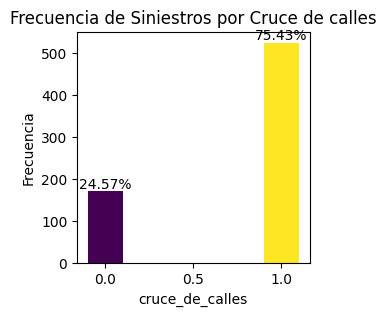

In [24]:
# Gráfica de frecuencias-cruces de calles (columna 'cruce_de_calles')
cantidad = df_homicidios_hechos['cruce_de_calles'].value_counts().sort_index()
total = cantidad.sum()

plt.figure(figsize=(3, 3))
colors = plt.cm.viridis(np.linspace(0, 1, len(cantidad)))
bars = plt.bar(cantidad.index, cantidad, width=0.2, color=colors)
plt.title('Frecuencia de Siniestros por Cruce de calles')
plt.xlabel('cruce_de_calles')
plt.ylabel('Frecuencia')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{height/total:.2%}', ha='center', va='bottom')

plt.show()


A partir de la columna creada 'cruce_de_calles' en el gráfico se puede observar que el 75.43% de los accidentes ocurren en los cruces de calles, y solo el 24.57% en inmediaciones de la cuadra, es decir, que las esquinas son lugares más propensos a la ocurrencia de accidentes.

Las esquinas suelen ser puntos de confluencia de diferentes flujos de tráfico, ya sea vehículos que cambian de dirección, peatones cruzando la calle o ciclistas compartiendo la vía.

En estas intersecciones los conductores pueden tener su visibilidad reducida debido a obstáculos como edificios, árboles, postes de luz u otros vehículos estacionados.

Esta combinación aumenta la probabilidad de accidentes.

**VALORES DUPLICADOS O FALTANTES**

---
---

In [25]:
# Verifica si hay valores faltantes en la columna 'ID'
valores_faltantes = df_homicidios_hechos['ID'].isnull().sum()
if valores_faltantes > 0:
    print(f"Hay {valores_faltantes} valores faltantes en la columna 'ID'.")
else:
    print("No hay valores faltantes en la columna 'ID'.")

No hay valores faltantes en la columna 'ID'.


In [26]:
# Verifica si hay valores repetidos en la columna 'ID'
valores_repetidos = df_homicidios_hechos['ID'].duplicated().sum()
if valores_repetidos > 0:
    print(f"Hay {valores_repetidos} valores repetidos en la columna 'ID'.")
else:
    print("No hay valores repetidos en la columna 'ID'.")

No hay valores repetidos en la columna 'ID'.


In [28]:
# Verifica si los valores de la columna 'ID' están ordenados de manera continua
valores_continuos = df_homicidios_hechos['ID'].is_monotonic_increasing
if valores_continuos:
    print("Los valores en la columna 'ID' están ordenados de manera continua.")
else:
    print("Los valores en la columna 'ID' no están ordenados de manera continua.")

Los valores en la columna 'ID' están ordenados de manera continua.


**TIPOS DE DATOS Y ELIMINACIÓN DE COLUMNAS INNECESARIAS**

---
---

In [29]:
# Muestra el tipo de datos por columnas
df_homicidios_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Dirección Normalizada  688 non-null    object        
 12  COMUNA                 696 non-null    int64         
 13  XY (C

La columna de franja horaria (HH) es de tipo object y podría ser de tipo entero ya que contiene los valores de horas enteras, desde las 00:00 hasta las 23:00 hs.

In [30]:
# Muestra los valores únicos de la columna 'HH'
df_homicidios_hechos['HH'].unique()

array([4, 1, 7, 0, 5, 18, 19, 15, 11, 22, 16, 9, 23, 6, 10, 17, 12, 8, 20,
       21, 14, 3, 2, 13, 'SD'], dtype=object)

In [31]:
# Muestra las filas que contienen valores no numéricos en la columna 'HH'
df_homicidios_hechos[df_homicidios_hechos['HH']=='SD']

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,cruce_de_calles
518,2019-0103,1,2019-12-18,2019,12,18,SD,SD,"PAZ, GRAL. AV. Y GRIVEO",GRAL PAZ,"PAZ, GRAL. AV.","PAZ, GRAL. AV. y GRIVEO",11,Point (94643.11254058 103831.57115061),-58.52169422,-34.59471640,MOTO-MOTO,MOTO,MOTO,1


Al existir en la columna 'HH' valores no numéricos, primero se convierte a valores numericos teniendo en cuenta que el valor 'SD' se tratará como NaN, y luego se convierte a valores enteros.

In [32]:
#Convierte la columna 'HH' a valores enteros
df_homicidios_hechos['HH'] = pd.to_numeric(df_homicidios_hechos['HH'], errors='coerce')
df_homicidios_hechos['HH'] = df_homicidios_hechos['HH'].astype('Int64')

In [33]:
# Filtra valores nuloes en la columna 'HH'
df_homicidios_hechos[df_homicidios_hechos['HH'].isnull()]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,cruce_de_calles
518,2019-0103,1,2019-12-18,2019,12,18,SD,<NA>,"PAZ, GRAL. AV. Y GRIVEO",GRAL PAZ,"PAZ, GRAL. AV.","PAZ, GRAL. AV. y GRIVEO",11,Point (94643.11254058 103831.57115061),-58.52169422,-34.59471640,MOTO-MOTO,MOTO,MOTO,1


Teniendo el dato de la Franja Horaria en la que ocurrió el siniestro, se considera innecesario conservar la columna 'HORA' que contiene la hora exacta del hecho, por lo cual se procede a su eliminación.

In [34]:
df_homicidios_hechos.drop ('HORA', axis=1, inplace=True)

Adicionalmente se observa que las columnas 'LUGAR_DEL_HECHO', 'Calle' y 'Dirección Normalizada' tienen información redundante, por lo que se conservará solamente la dirección normalizada y se eliminaran las columnas 'LUGAR_DEL_HECHO' y 'Calle'.

In [35]:
# Verifica los valores nulos de la columna 'LUGAR_DEL_HECHO'
df_homicidios_hechos[df_homicidios_hechos['LUGAR_DEL_HECHO'].isnull()]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,cruce_de_calles


In [36]:
# Verifica los valores nulos de la columna 'Dirección Normalizada'
df_homicidios_hechos[df_homicidios_hechos['Dirección Normalizada'].isnull()]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,cruce_de_calles
38,2016-0052,1,2016-04-20,2016,4,20,20,AUTOPISTA LUGONES PK 10000,AUTOPISTA,"LUGONES, LEOPOLDO AV.",NaN,13,Point (. .),.,.,MOTO-SD,MOTO,SD,0
106,2016-0136,1,2016-10-25,2016,10,25,0,AU BUENOS AIRES - LA PLATA KM. 4,AUTOPISTA,AUTOPISTA BUENOS AIRES - LA PLATA,NaN,4,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS,0
119,2016-0151,1,2016-11-18,2016,11,18,20,SD,CALLE,NaN,NaN,0,Point (. .),.,.,PEATON-SD,PEATON,SD,0
180,2017-0050,2,2017-04-28,2017,4,28,11,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA,AUTOPISTA PERITO MORENO,NaN,9,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS,0
181,2017-0051,1,2017-05-01,2017,5,1,3,AU DELLEPIANE 2400,AUTOPISTA,AUTOPISTA DELLEPIANE LUIS TTE. GRAL.,NaN,7,Point (. .),.,.,AUTO-AUTO,AUTO,AUTO,0
313,2018-0039,1,2018-04-21,2018,4,21,22,AUTOPISTA LUGONES KM 4.7,AUTOPISTA,"LUGONES, LEOPOLDO AV.",NaN,14,Point (. .),.,.,PEATON-AUTO,PEATON,AUTO,0
546,2020-0026,1,2020-05-17,2020,5,17,6,"LUGONES, LEOPOLDO AV. KM 6,1",AUTOPISTA,"LUGONES, LEOPOLDO AV.",NaN,14,Point (. .),.,.,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO,0
621,2021-0023,1,2021-03-01,2021,3,1,9,"AU BUENOS AIRES LA PLATA KM 4,5",AUTOPISTA,AUTOPISTA BUENOS AIRES - LA PLATA,NaN,4,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS,0


Al existir valores nulos en la columna 'Dirección Normalizada', es decir que no está la dirección normalizada, se observa también que para esas columnas tampoco se escuentran los valores de coordenadas 'pos x' y 'pos y', por esta razón se decide imputar estos valores con los correspondientes de la columna 'LUGAR_DEL_HECHO' ya que esta es la información más certera que se tiene de la ubicación del siniestro.

In [37]:
# Reemplaza los valores NaN en 'Dirección Normalizada' con los valores de 'LUGAR_DEL_HECHO'
df_homicidios_hechos['Dirección Normalizada'].fillna(df_homicidios_hechos['LUGAR_DEL_HECHO'], inplace=True)

In [38]:
# Verifica la imputación
df_homicidios_hechos[df_homicidios_hechos['Dirección Normalizada'].isnull()]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,cruce_de_calles


In [39]:
# Elimina la columna 'LUGAR_DEL_HECHO'
df_homicidios_hechos.drop ('LUGAR_DEL_HECHO', axis=1, inplace=True)

In [40]:
# Elimina la columna 'Calle'
df_homicidios_hechos.drop ('Calle', axis=1, inplace=True)

Además se observa también que en estos casos donde no estaba la dirección normalizada tampoco se completaron los datos de las coordenadas. Columnas: 'XY (CABA)', 'pos x' y 'pos y'.

In [41]:
# Filtrar las filas que no contienen números en la columna 'XY (CABA)', porque no contienen las coordenadas, pero tampoco estan vacias
filas_sin_numeros = df_homicidios_hechos[~df_homicidios_hechos['XY (CABA)'].str.contains(r'\d')]
filas_sin_numeros

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HH,TIPO_DE_CALLE,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,cruce_de_calles
35,2016-0049,1,2016-04-17,2016,4,17,0,AUTOPISTA,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,4,Point (. .),-58.37714647568196,-34.63657525428238,SD-SD,SD,SD,0
38,2016-0052,1,2016-04-20,2016,4,20,20,AUTOPISTA,AUTOPISTA LUGONES PK 10000,13,Point (. .),.,.,MOTO-SD,MOTO,SD,0
71,2016-0096,1,2016-07-25,2016,7,25,7,AUTOPISTA,AUTOPISTA DELLEPIANE LUIS TTE. GRAL.,8,Point (. .),-58.47433193007387,-34.66684950051973,MOTO-CARGAS,MOTO,CARGAS,0
106,2016-0136,1,2016-10-25,2016,10,25,0,AUTOPISTA,AU BUENOS AIRES - LA PLATA KM. 4,4,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS,0
119,2016-0151,1,2016-11-18,2016,11,18,20,CALLE,SD,0,Point (. .),.,.,PEATON-SD,PEATON,SD,0
139,2016-0174,1,2016-12-27,2016,12,27,0,AUTOPISTA,AUTOPISTA 25 DE MAYO,0,Point (. .),.,.,SD-SD,SD,SD,0
176,2017-0042,1,2017-04-10,2017,4,10,9,GRAL PAZ,"LUGONES, LEOPOLDO AV.",14,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS,0
180,2017-0050,2,2017-04-28,2017,4,28,11,AUTOPISTA,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,9,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS,0
181,2017-0051,1,2017-05-01,2017,5,1,3,AUTOPISTA,AU DELLEPIANE 2400,7,Point (. .),.,.,AUTO-AUTO,AUTO,AUTO,0
256,2017-0140,1,2017-11-19,2017,11,19,23,AUTOPISTA,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,4,Point (. .),.,.,MOTO-PASAJEROS,MOTO,PASAJEROS,0


Se puede observar que si faltan las coordenadas en las columnas 'pos x' y 'pos y', tampoco estan completos los valores en la columna 'XY (CABA)', por lo tanto, al no tener de donde imputar datos, se procederá a completar esos datos en las columnas 'pos x' y 'pos y' con SD y se eliminará la columna 'XY (CABA)'

In [42]:
# Función para verificar si la cadena contiene algún número
def contiene_numero(cadena):
    return any(caracter.isdigit() for caracter in cadena)

In [43]:
# Reemplaza las celdas en 'pos x' y 'pos y' que no contienen ningún número con 'SD'
df_homicidios_hechos.loc[~df_homicidios_hechos['pos x'].apply(contiene_numero), 'pos x'] = 'SD'

# Reemplaza las celdas en 'pos x' que no contienen ningún número con 'SD'
df_homicidios_hechos.loc[~df_homicidios_hechos['pos y'].apply(contiene_numero), 'pos y'] = 'SD'

In [44]:
# Elimina la columna 'XY (CABA)'
df_homicidios_hechos.drop ('XY (CABA)', axis=1, inplace=True)

In [45]:
df_homicidios_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HH                     695 non-null    Int64         
 7   TIPO_DE_CALLE          696 non-null    object        
 8   Dirección Normalizada  696 non-null    object        
 9   COMUNA                 696 non-null    int64         
 10  pos x                  696 non-null    object        
 11  pos y                  696 non-null    object        
 12  PARTICIPANTES          696 non-null    object        
 13  VICTI

**EXPLORACIÓN DE LAS COLUMNAS RELACIONADAS A LAS CARACTERÍSTICAS DEL SINIESTRO**

---
---

In [48]:
df_homicidios_hechos['VICTIMA'].value_counts()

VICTIMA
MOTO           295
PEATON         264
AUTO            83
BICICLETA       29
SD               9
CARGAS           7
PASAJEROS        5
MOVIL            2
OBJETO FIJO      1
PEATON_MOTO      1
Name: count, dtype: int64

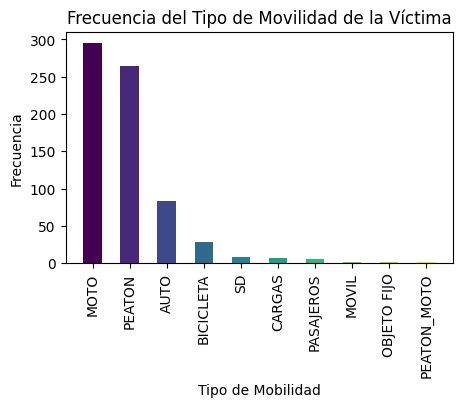

In [49]:
# Gráfica de frecuencias-víctima (columna 'VICTIMA')
cantidad = df_homicidios_hechos['VICTIMA'].value_counts()
plt.figure(figsize=(5, 3))
plt.xticks(rotation=90)
colors = plt.cm.viridis(np.linspace(0, 1, len(cantidad)))
bars = plt.bar(cantidad.index, cantidad, width=0.5, color=colors)
plt.title('Frecuencia del Tipo de Movilidad de la Víctima')
plt.xlabel('Tipo de Mobilidad')
plt.ylabel('Frecuencia')
plt.show()


En los soniestros registrados, la mayoría de las víctimas se encontraban en moto o eran peatones. Tanto los peatones como los motociclistas están más expuestos al entorno en comparación con los ocupantes de vehículos cerrados como automóviles, ya que tienen mucha menos protección que los ocupantes de vehículos, como cinturones de seguridad, airbags y carrocerías.

In [50]:
df_homicidios_hechos['ACUSADO'].value_counts()

ACUSADO
AUTO           204
PASAJEROS      173
CARGAS         146
OBJETO FIJO     62
MOTO            57
SD              23
MULTIPLE        17
BICICLETA        7
OTRO             6
TREN             1
Name: count, dtype: int64

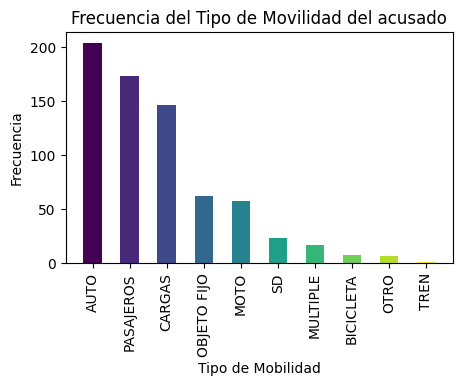

In [51]:
# Gráfica de frecuencias-acusado (columna 'ACUSADO')
cantidad = df_homicidios_hechos['ACUSADO'].value_counts()
plt.figure(figsize=(5, 3))
plt.xticks(rotation=90)
colors = plt.cm.viridis(np.linspace(0, 1, len(cantidad)))
bars = plt.bar(cantidad.index, cantidad, width=0.5, color=colors)
plt.title('Frecuencia del Tipo de Movilidad del acusado')
plt.xlabel('Tipo de Mobilidad')
plt.ylabel('Frecuencia')
plt.show()

En contraposición a lo anterior, los acusados en los siniestros viales, mayoritariamente son personas que se movilizaban en autos, como pasajeros de transportes de omnibus o en transportes de cargas, en la ocurrencia de un siniestro, estos medios de transporte son más susceptibles de atropellar de manera fatal a otros ocupantes de la vía.

**EXPLORACIÓN DE LAS COLUMNAS RELACIONADAS A LAS FECHAS**

---
---

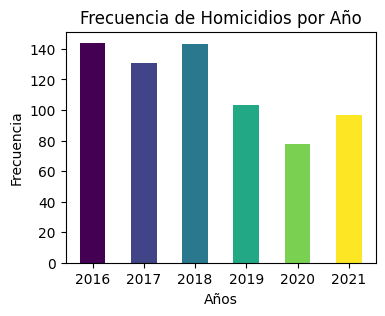

In [52]:
# Gráfica de frecuencias-años (columna 'AAAA')

cantidad = df_homicidios_hechos['AAAA'].value_counts().sort_index()
plt.figure(figsize=(4, 3))
colors = plt.cm.viridis(np.linspace(0, 1, len(cantidad)))
bars = plt.bar(cantidad.index, cantidad, width=0.5, color=colors)
plt.title('Frecuencia de Homicidios por Año')
plt.xlabel('Años')
plt.ylabel('Frecuencia')
plt.show()

---

Los años 2016, 2017 y 2018 son los que mas siniestros registraron, luego se observa un descenso.

El año 2020 fue el que menos siniestros registró (coincidiendo eventualmente con la cuarentena y aislamiento por la pandemia de COVID-19) lo que disminuyó significativamente el movimiento de personas y los viajes en sentido general.

Menos turismo, más trabajo remoto, menos presencialidad.

---

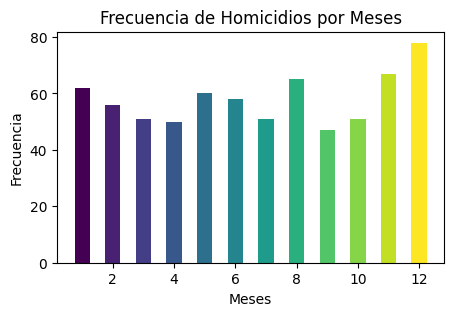

In [53]:
# Gráfica de frecuencias-meses (columna 'MM')
cantidad = df_homicidios_hechos['MM'].value_counts().sort_index()
plt.figure(figsize=(5, 3))
colors = plt.cm.viridis(np.linspace(0, 1, len(cantidad)))
bars = plt.bar(cantidad.index, cantidad, width=0.5, color=colors)
plt.title('Frecuencia de Homicidios por Meses')
plt.xlabel('Meses')
plt.ylabel('Frecuencia')
plt.show()

---
El mes de diciembre es el que mas siniestros registra en total, coincidiendo con las fiestas de fin de año, lo que puede significar un factor de aumento de siniestros viales. Durante este mes, es común que las personas viajen más, lo que aumenta el tráfico y la probabilidad de accidentes de tránsito.

---

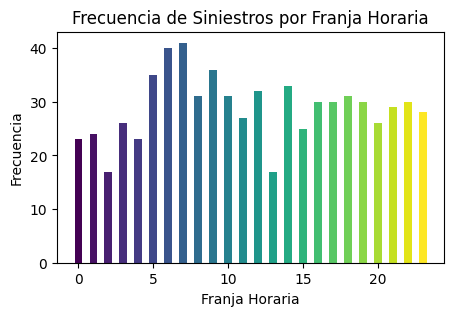

In [54]:
# Gráfica de frecuencias-Franja horaria (columna 'HH')
cantidad = df_homicidios_hechos['HH'].value_counts().sort_index()
plt.figure(figsize=(5, 3))
colors = plt.cm.viridis(np.linspace(0, 1, len(cantidad)))
bars = plt.bar(cantidad.index, cantidad, width=0.5, color=colors)
plt.title('Frecuencia de Siniestros por Franja Horaria')
plt.xlabel('Franja Horaria')
plt.ylabel('Frecuencia')
plt.show()



En el gráfico se observa que durante la franja horaria de las 06:00 hs y las 07:00 hs (que sería entre las 6:00 y las 8:00 de la mañana) se registra mayor cantidad de siniestros, coincidiendo con las horas en que la mayoría de las personas se movilizan a sus actividades diarias.

Además se observa una disminución de la ocurrencia de siniestros durante la franja horaria de las 02:00 hs y las 13:00 hs aproximadamente.


Se procede a analizar la frecuencia de siniestros por día de la semana, para lo cual se crea la columna 'dia_semana'

In [55]:
# Crea una nueva columna que indique el día de la semana de la fecha
df_homicidios_hechos['dia_semana'] = df_homicidios_hechos['FECHA'].dt.day_name()
df_homicidios_hechos.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HH,TIPO_DE_CALLE,Dirección Normalizada,COMUNA,pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,cruce_de_calles,dia_semana
0,2016-0001,1,2016-01-01,2016,1,1,4,AVENIDA,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,1,Friday
1,2016-0002,1,2016-01-02,2016,1,2,1,GRAL PAZ,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,1,Saturday
2,2016-0003,1,2016-01-03,2016,1,3,7,AVENIDA,ENTRE RIOS AV. 2034,1,-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO,0,Sunday
3,2016-0004,1,2016-01-10,2016,1,10,0,AVENIDA,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,-58.46503904,-34.68092974,MOTO-SD,MOTO,SD,1,Sunday
4,2016-0005,1,2016-01-21,2016,1,21,5,AVENIDA,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS,1,Thursday


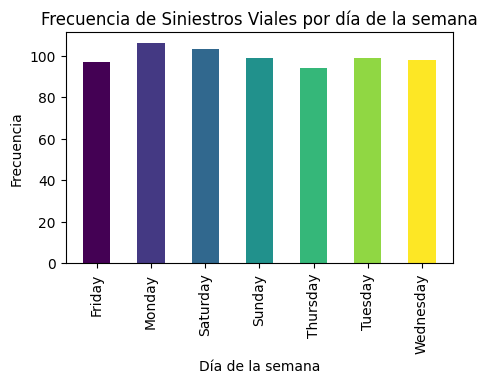

In [56]:
# Gráfica de frecuencias- por dia de la semana (columna 'dia_semana')
cantidad = df_homicidios_hechos['dia_semana'].value_counts().sort_index()
plt.figure(figsize=(5, 3))
plt.xticks(rotation=90)
colors = plt.cm.viridis(np.linspace(0, 1, len(cantidad)))
bars = plt.bar(cantidad.index, cantidad, width=0.5, color=colors)
plt.title('Frecuencia de Siniestros Viales por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Frecuencia')
plt.show()

Se observa que los días lunes son los que más accidentes ocurren, seguido de los días sábados, sin embargo las diferencias no son muy notables, de manera general, todos los días ocurren accidentes en igual magnitud.

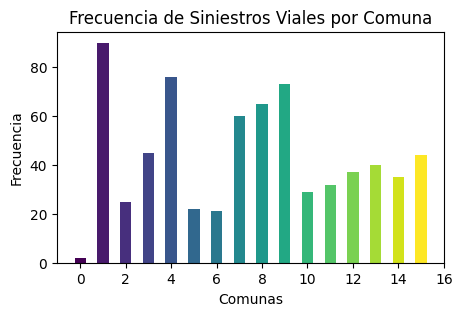

In [57]:
# Gráfica de frecuencias-Comunas (columna 'COMUNA')
cantidad = df_homicidios_hechos['COMUNA'].value_counts().sort_index()
plt.figure(figsize=(5, 3))
colors = plt.cm.viridis(np.linspace(0, 1, len(cantidad)))
bars = plt.bar(cantidad.index, cantidad, width=0.5, color=colors)
plt.title('Frecuencia de Siniestros Viales por Comuna')
plt.xlabel('Comunas')
plt.ylabel('Frecuencia')
plt.show()

---

La comuna 1 es la que mas accidentes registra, esta incluye los barrios: Retiro, San Nicolás, Puerto Madero, San Telmo, Montserrat y Constitución.

Esta comuna se considera la sede de la denominada "City Porteña", centro financiero de la ciudad, es también uno de los polos turísticos más destacados y en ella se encuentran los principales edificios del poder ejecutivo (nacional y local).

Estas características hacen que diariamente sea una zona de mucho tránsito y movimiento de personas.

Seguidamente en cantidad de accidentes le sigue la comuna 4, está ubicada al sur de la Ciudad e incluye los barrios: La Boca, Barracas, Parque Patricios y Nueva Pompeya.

En tercer lugar en cantidad de accidentes se encuentra la comuna 9, ubicada en el sudoeste de la Ciudad, la cual abarca los barrios de Liniers, Mataderos y Parque Avellaneda.

---

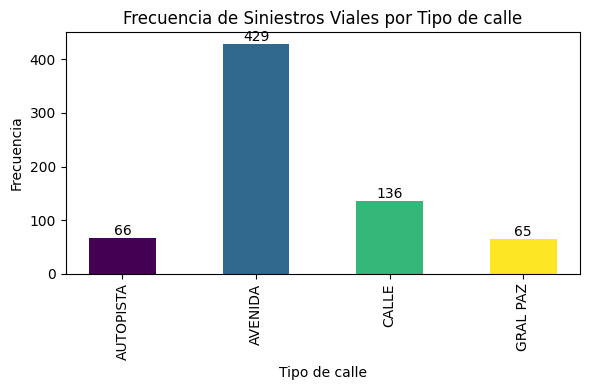

In [58]:
# Gráfica de frecuencias-Tipo de calle (columna 'TIPO_DE_CALLE')
cantidad = df_homicidios_hechos['TIPO_DE_CALLE'].value_counts().sort_index()
plt.figure(figsize=(6, 4))
plt.xticks(rotation=90)
colors = plt.cm.viridis(np.linspace(0, 1, len(cantidad)))
bars = plt.bar(cantidad.index, cantidad, width=0.5, color=colors)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, '%d' % int(height), ha='center', va='bottom')

plt.title('Frecuencia de Siniestros Viales por Tipo de calle')
plt.xlabel('Tipo de calle')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

Evidentemente, el gráfico muestra que la gran mayoría de los accidentes ocurren en las avenidas, seguido de las calles y por último las autopistas, considerando que la General Paz es una autopista de ingreso a Buenos Aires.

La categoría 'AVENIDA' en sí misma tiene más registros de accidentes que la suma de las otras tres categorías ('AUTOPISTA' + 'CALLE' + 'GRAL PAZ').

Las avenidas tienden a tener una mayor densidad de tráfico en comparación con las calles y autopistas, las mismas suelen ser vías principales dentro de las ciudades, con mayor velocidad de circulación, cantidad de intersecciones, semáforos y cruces peatonales, lo que aumenta la probabilidad de colisiones.

**RELACIÓN ENTRE VARIABLES**

---
---

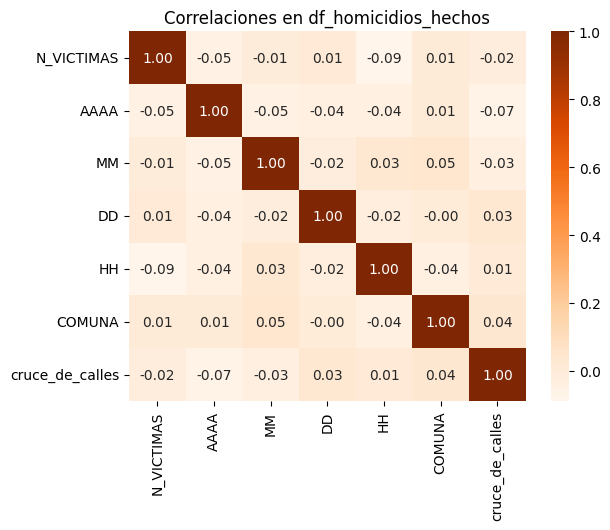

In [60]:
# Elimina filas con valores nulos
df_homicidios_hechos = df_homicidios_hechos.dropna()

df_numeric = df_homicidios_hechos.select_dtypes(include=['number'])

# Correlacion
correlacion = df_numeric.corr()

# Matriz de correlación
if correlacion.empty:
    print("La matriz de correlación está vacía después de eliminar NaN. Revisa tus datos.")
else:
# Mapa de calor
    sns.heatmap(correlacion, annot=True, cmap='Oranges', fmt=".2f")
    plt.title('Correlaciones en df_homicidios_hechos')
    plt.show()

---

La matriz de correlación muestra que no existe una correlación significativa entre variables, todos los valores muy cercanos a cero. Sin embargo se puede ver alguna correlación entre el cruce_de_calles y la comuna (0.04) y con el día (0.03). También entre la comuna y el mes (0.05) y el mes y la hora (0.03). Debe profundizarse en el análisis, explorando por ejemplo si existe correlación entre estas variables teniendo en cuenta si es día de semana o fin de semana.

---

Con la columna 'dia_semana' se crea una nueva columna dividiendo la semana en fin de semana (valor 1) para los dias sabados y domingos, y dis entre semana (valor 0) para los días de lunes a viernes.

In [61]:
# Crear la nueva columna 'fin_de_semana' tomando valor '1' para sábado y domingo y valor '0' para dias de semana de lunes a viernes.
df_homicidios_hechos['fin_de_semana'] = df_homicidios_hechos['dia_semana'].apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)

In [62]:
df_homicidios_hechos.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HH,TIPO_DE_CALLE,Dirección Normalizada,COMUNA,pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,cruce_de_calles,dia_semana,fin_de_semana
0,2016-0001,1,2016-01-01,2016,1,1,4,AVENIDA,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,1,Friday,0
1,2016-0002,1,2016-01-02,2016,1,2,1,GRAL PAZ,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,1,Saturday,1
2,2016-0003,1,2016-01-03,2016,1,3,7,AVENIDA,ENTRE RIOS AV. 2034,1,-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO,0,Sunday,1
3,2016-0004,1,2016-01-10,2016,1,10,0,AVENIDA,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,-58.46503904,-34.68092974,MOTO-SD,MOTO,SD,1,Sunday,1
4,2016-0005,1,2016-01-21,2016,1,21,5,AVENIDA,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS,1,Thursday,0


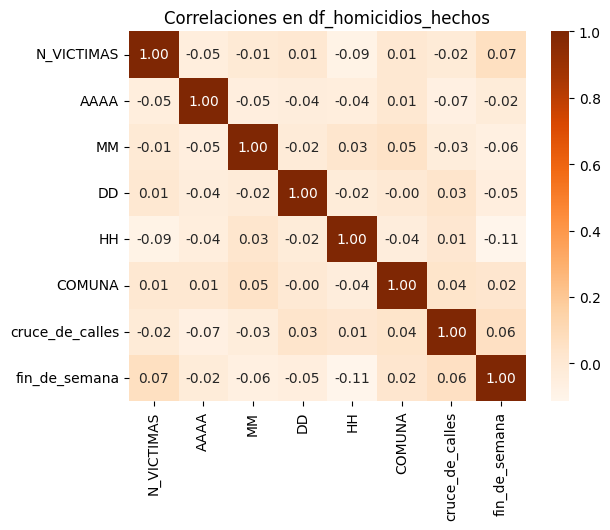

In [63]:
# Elimina filas con valores nulos
df_homicidios_hechos = df_homicidios_hechos.dropna()

df_numeric = df_homicidios_hechos.select_dtypes(include=['number'])

# Correlacion
correlacion = df_numeric.corr()

# Matriz de correlación
if correlacion.empty:
    print("La matriz de correlación está vacía después de eliminar NaN. Revisa tus datos.")
else:
# Mapa de calor
    sns.heatmap(correlacion, annot=True, cmap='Oranges', fmt=".2f")
    plt.title('Correlaciones en df_homicidios_hechos')
    plt.show()

---

En esta nueva matriz, que incluye los fines de semana, se puede observar una correlación entre estos con el número de víctimas (0.08) y los cruces de calles(0.06), si bien siguen siendo valores cercanos a cero, son algo mayores que en la matriz anterior, también entre cruces de calles con la comuna (0.04), sin embargo, hay que explorar mas a profudidad para encontrar el sentido o fundamento a estas observaciones generales.

---

**ESTANDARIZACIÓN DE LOS NOMBRES DE LAS COLUMNAS**

---
---

In [64]:
df_homicidios_hechos.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HH', 'TIPO_DE_CALLE',
       'Dirección Normalizada', 'COMUNA', 'pos x', 'pos y', 'PARTICIPANTES',
       'VICTIMA', 'ACUSADO', 'cruce_de_calles', 'dia_semana', 'fin_de_semana'],
      dtype='object')

In [65]:
df_homicidios_hechos = df_homicidios_hechos.rename(columns={
                                                                      'ID':'Id_siniestro',
                                                              'N_VICTIMAS':'Cantidad_de_victimas',
                                                                   'FECHA':'Fecha',
                                                                    'AAAA':'Anio',
                                                                      'MM':'Mes',
                                                                      'DD':'Dia',
                                                                      'HH':'Franja_horaria',
                                                           'TIPO_DE_CALLE':'Tipo_de_calle',
                                                   'Dirección Normalizada':'Direccion_normalizada',
                                                                  'COMUNA':'Comuna',
                                                                   'pos x':'Lon_x',
                                                                   'pos y':'Lat_y',
                                                           'PARTICIPANTES':'Participantes',
                                                                 'VICTIMA':'Victima',
                                                                 'ACUSADO':'Acusado',
                                                         'cruce_de_calles':'Cruce_de_calles',
                                                              'dia_semana':'Dia_semana',
                                                           'fin_de_semana':'Fin_de_semana'
                                                                 })

In [66]:
df_homicidios_hechos

,Id_siniestro,Cantidad_de_victimas,Fecha,Anio,Mes,Dia,Franja_horaria,Tipo_de_calle,Direccion_normalizada,Comuna,Lon_x,Lat_y,Participantes,Victima,Acusado,Cruce_de_calles,Dia_semana,Fin_de_semana
0,2016-0001,1,2016-01-01,2016,1,1,4,AVENIDA,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,1,Friday,0
1,2016-0002,1,2016-01-02,2016,1,2,1,GRAL PAZ,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,1,Saturday,1
2,2016-0003,1,2016-01-03,2016,1,3,7,AVENIDA,ENTRE RIOS AV. 2034,1,-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO,0,Sunday,1
3,2016-0004,1,2016-01-10,2016,1,10,0,AVENIDA,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,-58.46503904,-34.68092974,MOTO-SD,MOTO,SD,1,Sunday,1
4,2016-0005,1,2016-01-21,2016,1,21,5,AVENIDA,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS,1,Thursday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021-12-13,2021,12,13,17,AVENIDA,RIESTRA AV. y MOM,7,-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO,1,Monday,0
692,2021-0094,1,2021-12-20,2021,12,20,1,AUTOPISTA,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO,1,Monday,0
693,2021-0095,1,2021-12-30,2021,12,30,0,AVENIDA,GAONA AV. y TERRADA,11,-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS,1,Thursday,0
694,2021-0096,1,2021-12-15,2021,12,15,10,AVENIDA,"PERON, EVA AV. 4071",9,-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS,0,Wednesday,0



**ANÁLISIS DE HOMICIDIOS-VICTIMAS**

---
---

**EXTRACCIÓN Y EXPLORACIÓN DE LOS DATOS**

---
---

In [69]:
# Lee el archivo y carga el dataframe desde la pestaña 'VICTIMAS'
df_homicidios_victimas = pd.read_excel('C:/Users/dunie/Desktop/Proy_Int_2_Data_Analyst_DMG/data_inicial_xlsx/homicidios.xlsx', sheet_name='VICTIMAS')

# Muestra las primeras filas del DataFrame
df_homicidios_victimas.head()


,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


In [70]:
# Explora datos nulos y tipos de datos
df_homicidios_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


In [71]:
# Muestra la forma del Dataframe
df_homicidios_victimas.shape

(717, 10)

In [72]:
# Muestra las principales métricas descriptivas de las columnas numéricas
df_homicidios_victimas.describe()

,FECHA,AAAA,MM,DD
count,717,717.000000,717.000000,717.000000
mean,2018-09-09 01:36:24.100418304,2018.174338,6.688982,15.960948
min,2016-01-01 00:00:00,2016.000000,1.000000,1.000000
25%,2017-04-01 00:00:00,2017.000000,4.000000,9.000000
50%,2018-07-07 00:00:00,2018.000000,7.000000,16.000000
75%,2019-12-18 00:00:00,2019.000000,10.000000,23.000000
max,2021-12-30 00:00:00,2021.000000,12.000000,31.000000
std,NaN,1.672655,3.575140,8.683358


**CONCLUSIONES: Características generales del Dataset**


El dataset entregado tiene 10 columnas y 717 filas, en comparación con el de 'HECHOS' que tiene 696 filas. Esto se debe a que en un mismo siniestro pueden existir mas de una víctima, lo que hace que aumente la cantidad de registros de 'VICTIMAS'

Los registros de fecha, años, mes y día son similares a los del dataframe de HECHOS.

**VALORES DUPLICADOS O FALTANTES**

---
---

In [74]:
# Cuenta la cantidad de valores duplicados en el DataFrame
cantidad_duplicados=df_homicidios_victimas.duplicated().sum()
print("Cantidad de valores duplicados en el DataFrame:", cantidad_duplicados)

Cantidad de valores duplicados en el DataFrame: 0


In [75]:
# Verifica si hay valores faltantes en la columna 'ID_hecho'
valores_faltantes = df_homicidios_victimas['ID_hecho'].isnull().sum()
if valores_faltantes > 0:
    print(f"Hay {valores_faltantes} valores faltantes en la columna 'ID_hecho'.")
else:
    print("No hay valores faltantes en la columna 'ID_hecho'.")

No hay valores faltantes en la columna 'ID_hecho'.


In [76]:
# Verifica si hay valores repetidos en la columna 'ID'
valores_repetidos = df_homicidios_victimas['ID_hecho'].duplicated().sum()
if valores_repetidos > 0:
    print(f"Hay {valores_repetidos} valores repetidos en la columna 'ID_hecho'.")
else:
    print("No hay valores repetidos en la columna 'ID_hecho'.")

Hay 21 valores repetidos en la columna 'ID_hecho'.


Como se mencionó, estos valores de 'ID_hecho' repetidos corresponden con los accidentes en los que hubo más de una víctima fatal.

**VALORES NULOS Y TIPOS DE DATOS**

---
---


In [77]:
df_homicidios_victimas.isnull().sum()

ID_hecho               0
FECHA                  0
AAAA                   0
MM                     0
DD                     0
ROL                    0
VICTIMA                0
SEXO                   0
EDAD                   0
FECHA_FALLECIMIENTO    0
dtype: int64

In [78]:
df_homicidios_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


La columna 'EDAD' tiene 53 datos nulos y es de tipo object por lo que se procede a la transformación de la misma.

In [79]:
# Convierte la columna 'EDAD' a tipo numérico, tratando los valores no válidos como NaN
df_homicidios_victimas['EDAD'] = pd.to_numeric(df_homicidios_victimas['EDAD'], errors='coerce')
df_homicidios_victimas['EDAD'] = df_homicidios_victimas['EDAD'].astype('Int64')

In [80]:
# Filtra los valores nulos de la columna 'EDAD'
df_homicidios_victimas[df_homicidios_victimas['EDAD'].isnull()]


,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
30,2016-0041,2016-03-29,2016,3,29,PASAJERO_ACOMPAÑANTE,MOTO,MASCULINO,<NA>,2016-03-30 00:00:00
33,2016-0045,2016-04-11,2016,4,11,CONDUCTOR,MOTO,MASCULINO,<NA>,SD
35,2016-0048,2016-04-15,2016,4,15,PEATON,PEATON,FEMENINO,<NA>,SD
36,2016-0049,2016-04-17,2016,4,17,SD,SD,SD,<NA>,SD
39,2016-0052,2016-04-20,2016,4,20,SD,MOTO,SD,<NA>,SD
55,2016-0077,2016-06-13,2016,6,13,PEATON,PEATON,FEMENINO,<NA>,SD
63,2016-0085,2016-06-29,2016,6,29,SD,MOTO,MASCULINO,<NA>,SD
72,2016-0096,2016-07-25,2016,7,25,CONDUCTOR,MOTO,MASCULINO,<NA>,SD
89,2016-0115,2016-09-02,2016,9,2,SD,SD,MASCULINO,<NA>,SD
93,2016-0119,2016-09-04,2016,9,4,PASAJERO_ACOMPAÑANTE,SD,FEMENINO,<NA>,SD


In [81]:
# Muestra la forma del dataframe resultante
df_homicidios_victimas[df_homicidios_victimas['EDAD'].isnull()].shape

(53, 10)

Hay 53 valores nulos en la columna 'EDAD', los cuales se pueden imputar con la media de las edades por sexo, y si no hubiera registro del sexo se podrían imputar con la media general de las edades.

In [82]:
# Calcula las medias de edades por sexo
medias_edades_por_sexo = df_homicidios_victimas.groupby('SEXO')['EDAD'].mean().astype('Int64')
print(medias_edades_por_sexo)

SEXO
FEMENINO       50
MASCULINO      39
SD           <NA>
Name: EDAD, dtype: Int64


In [83]:
# Imputa los valores faltantes de edad con las medias correspondientes por sexo
for sexo, media_edad in medias_edades_por_sexo.items():
    # Filtra las filas por sexo y donde la edad sea NaN
    filas_sexo_sin_edad = (df_homicidios_victimas['SEXO'] == sexo) & (df_homicidios_victimas['EDAD'].isnull())
    # Imputa la media de edad correspondiente al sexo
    df_homicidios_victimas.loc[filas_sexo_sin_edad, 'EDAD'] = media_edad

In [84]:
df_homicidios_victimas[df_homicidios_victimas['EDAD'].isnull()]

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
36,2016-0049,2016-04-17,2016,4,17,SD,SD,SD,<NA>,SD
39,2016-0052,2016-04-20,2016,4,20,SD,MOTO,SD,<NA>,SD
108,2016-0136,2016-10-25,2016,10,25,CONDUCTOR,MOTO,SD,<NA>,SD
121,2016-0151,2016-11-18,2016,11,18,PEATON,PEATON,SD,<NA>,SD
138,2016-0171,2016-12-25,2016,12,25,CONDUCTOR,MOTO,SD,<NA>,SD
141,2016-0174,2016-12-27,2016,12,27,SD,SD,SD,<NA>,SD


In [85]:
# Calcula la media general de las edades
medias_edades= df_homicidios_victimas['EDAD'].mean().round(0)
print(medias_edades)

42.0


In [86]:
# Imputar el valor 42 (media de edades) a los valores nulos en la columna 'EDAD' (que no tienen identificado el sexo)
df_homicidios_victimas['EDAD'].fillna(42, inplace=True)

In [87]:
df_homicidios_victimas

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12 00:00:00
713,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00
714,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00
715,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00


In [88]:
df_homicidios_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    Int64         
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: Int64(1), datetime64[ns](1), int64(3), object(5)
memory usage: 56.8+ KB


In [89]:
# Comprueba si hay valores nulos en el dataframe
df_homicidios_victimas.isnull().sum()

ID_hecho               0
FECHA                  0
AAAA                   0
MM                     0
DD                     0
ROL                    0
VICTIMA                0
SEXO                   0
EDAD                   0
FECHA_FALLECIMIENTO    0
dtype: int64

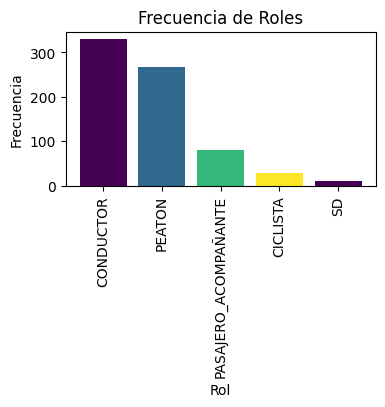

In [90]:
# Grafica la frecuencia de los Roles (columna 'ROL')
frecuencia_roles = df_homicidios_victimas['ROL'].value_counts()
plt.figure(figsize=(4, 2))
plt.xticks(rotation=90)
colors = plt.cm.viridis(np.linspace(0, 1, len(cantidad)))
plt.bar(frecuencia_roles.index, frecuencia_roles.values, color=colors)
plt.title('Frecuencia de Roles')
plt.xlabel('Rol')
plt.ylabel('Frecuencia')
plt.show()

---

Los conductores y peatones son las víctimas más frecuentes en los siniestros viales.

Tanto los conductores como los peatones tienen mayor exposición al riesgo, están constantemente expuestos al tráfico en las vías públicas, lo que aumenta su probabilidad de estar involucrados en un siniestro vial. Son considerados dos de los usuarios más vulnerables en la carretera.

---

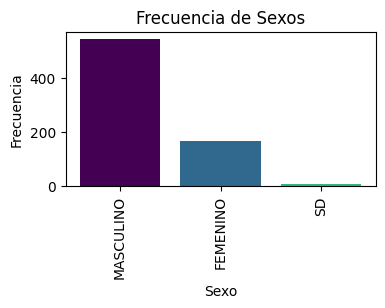

In [92]:
# Grafica la frecuencia de Sexos (columna 'SEXO')
frecuencia_sexos = df_homicidios_victimas['SEXO'].value_counts()
plt.figure(figsize=(4, 2))
plt.xticks(rotation=90)
colors = plt.cm.viridis(np.linspace(0, 1, len(cantidad)))
plt.bar(frecuencia_sexos.index, frecuencia_sexos.values, color=colors)
plt.title('Frecuencia de Sexos')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')
plt.show()

---
Se observa que hay una mayor frecuencia de personas del sexo masculino como victimas de accidentes que femeninos.

Los hombres tienden a participar en comportamientos de riesgo con más frecuencia que las mujeres, por ejemplo: conducir a altas velocidades, conducir bajo la influencia del alcohol o participar en actividades recreativas extremas.

Estudios han sugerido que los hombres tienden a tener un estilo de conducción más agresivo que las mujeres. Esto puede incluir una mayor propensión a tomar decisiones arriesgadas al volante

---

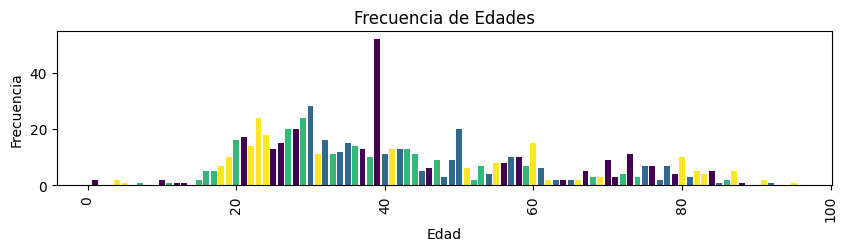

In [93]:
# Grafica la frecuencia de Edades (columna 'EDAD')
frecuencia_edades = df_homicidios_victimas['EDAD'].value_counts()
plt.figure(figsize=(10, 2))
plt.xticks(rotation=90)
colors = plt.cm.viridis(np.linspace(0, 1, len(cantidad)))
plt.bar(frecuencia_edades.index, frecuencia_edades.values, color=colors)
plt.title('Frecuencia de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

---

Las edades de entre 20 y 40 años son las que tienen la mayor frecuencia de víctimas.

Las personas en este rango de edad suelen estar en un período de mayor actividad social y profesional, lo que significa que pasan más tiempo en la carretera debido al trabajo, estudio, actividades recreativas, etc.

Los adultos jóvenes a menudo participan en comportamientos de riesgo en la carretera.

---

**VALORES ATÍPICOS (OUTLIERS)**

---
---

**VARIABLE: ' EDAD '**

In [94]:
# Calcular la media y la desviación estándar de la columna 'EDAD'

edades_sin_nan = df_homicidios_victimas['EDAD'].dropna()


media_edad = edades_sin_nan.mean()
desviacion_estandar_edad = edades_sin_nan.std()

# Definir el umbral para identificar valores atípicos (por ejemplo, 3 desviaciones estándar)
umbral = 3
limite_inferior = media_edad - umbral * desviacion_estandar_edad
limite_superior = media_edad + umbral * desviacion_estandar_edad

# Filtrar valores atípicos
outliers = df_homicidios_victimas[(df_homicidios_victimas['EDAD'] < limite_inferior) | (df_homicidios_victimas['EDAD'] > limite_superior)]

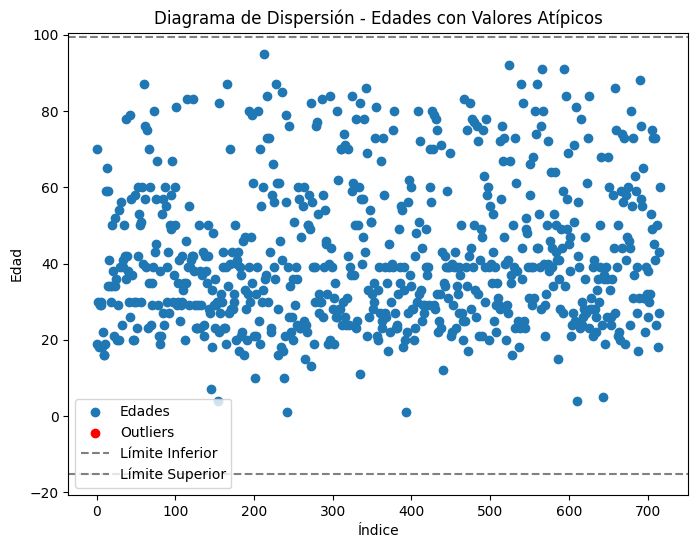

In [95]:
# Graficar un diagrama de dispersión para visualizar los valores atípicos
plt.figure(figsize=(8, 6))
plt.scatter(edades_sin_nan.index, edades_sin_nan, label='Edades')
plt.scatter(outliers.index, outliers['EDAD'], color='red', label='Outliers')
plt.axhline(y=limite_inferior, color='gray', linestyle='--', label='Límite Inferior')
plt.axhline(y=limite_superior, color='gray', linestyle='--', label='Límite Superior')
plt.title('Diagrama de Dispersión - Edades con Valores Atípicos')
plt.xlabel('Índice')
plt.ylabel('Edad')
plt.legend()
plt.show()

---

No se observan valores atípicos para las edades.

---

In [97]:
# Calcular la media y la desviación estándar de la columna 'Cantidad_de_victimas'
media_edad = df_homicidios_hechos['Cantidad_de_victimas'].mean()
desviacion_estandar_edad = df_homicidios_hechos['Cantidad_de_victimas'].std()

# Definir el umbral para identificar valores atípicos (por ejemplo, 3 desviaciones estándar)
umbral = 3
limite_inferior = media_edad - umbral * desviacion_estandar_edad
limite_superior = media_edad + umbral * desviacion_estandar_edad

# Filtrar valores atípicos
outliers = df_homicidios_hechos[(df_homicidios_hechos['Cantidad_de_victimas'] < limite_inferior) | (df_homicidios_hechos['Cantidad_de_victimas'] > limite_superior)]

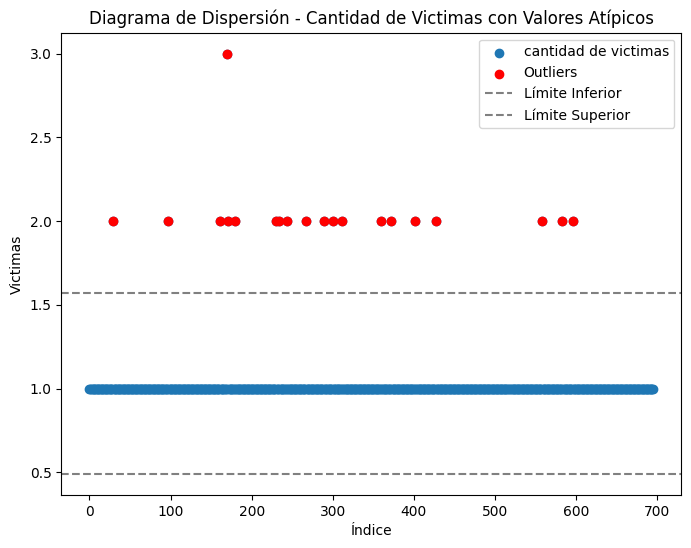

In [98]:
# Graficar un diagrama de dispersión para visualizar los valores atípicos
plt.figure(figsize=(8, 6))
plt.scatter(df_homicidios_hechos.index, df_homicidios_hechos['Cantidad_de_victimas'], label='cantidad de victimas')
plt.scatter(outliers.index, outliers['Cantidad_de_victimas'], color='red', label='Outliers')
plt.axhline(y=limite_inferior, color='gray', linestyle='--', label='Límite Inferior')
plt.axhline(y=limite_superior, color='gray', linestyle='--', label='Límite Superior')
plt.title('Diagrama de Dispersión - Cantidad de Victimas con Valores Atípicos')
plt.xlabel('Índice')
plt.ylabel('Victimas')
plt.legend()
plt.show()

---

Si bien el gráfico muestra como la cantidad de víctimas de mas de una como valores atípicos, se puede inferir que esto no es así, ya que entre 1 y 3 víctimas por siniestro son valores considerados como posibles dentro de los sucesos estudiados.
Esto puede deberse a que la gran mayoría de los sucesos tienen 1 única víctima. Esto se puede corroborar en el siguiente gráfico.

---

**ELIMINACIÓN DE COLUMNAS INNECESARIAS (REPETIDAS) PARA UNIR AMBOS DATAFRAMES**

---
---

las columnas 'FECHA', 'AAAA', 'MM', 'DD', 'VICTIMA' estan en ambos dataframes, por tanto se eliminaran.
Se mantendrá la columna ID_hecho para realizar la unión.

In [99]:
df_homicidios_victimas.drop(['FECHA','AAAA','MM','DD','VICTIMA'], axis=1, inplace=True)

**ESTANDARIZACIÓN DE LOS NOMBRES DE LAS COLUMNAS**

---
---

In [100]:
df_homicidios_victimas.columns

Index(['ID_hecho', 'ROL', 'SEXO', 'EDAD', 'FECHA_FALLECIMIENTO'], dtype='object')

In [101]:
df_homicidios_victimas = df_homicidios_victimas.rename(columns={
                                                                'ID_hecho': 'Id_siniestro',
                                                                     'ROL':'Rol',
                                                                    'SEXO':'Sexo',
                                                                    'EDAD':'Edad',
                                                     'FECHA_FALLECIMIENTO':'Fecha_fallecimiento',
                                                              })

In [102]:
df_homicidios_victimas

,Id_siniestro,Rol,Sexo,Edad,Fecha_fallecimiento
0,2016-0001,CONDUCTOR,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,CONDUCTOR,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,CONDUCTOR,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,CONDUCTOR,MASCULINO,18,SD
4,2016-0005,CONDUCTOR,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...
712,2021-0092,PEATON,FEMENINO,50,2021-12-12 00:00:00
713,2021-0093,PASAJERO_ACOMPAÑANTE,FEMENINO,18,2021-12-18 00:00:00
714,2021-0094,PASAJERO_ACOMPAÑANTE,FEMENINO,43,2021-12-20 00:00:00
715,2021-0095,CONDUCTOR,MASCULINO,27,2022-01-02 00:00:00


**UNIÓN DE AMBOS DATAFRAMES**

---
---

In [103]:
# Une ambos datasets por la columna 'Id_siniestro'
df_siniestros= df_homicidios_hechos.merge(df_homicidios_victimas, on="Id_siniestro", how="left")

In [104]:
df_siniestros.tail()

,Id_siniestro,Cantidad_de_victimas,Fecha,Anio,Mes,Dia,Franja_horaria,Tipo_de_calle,Direccion_normalizada,Comuna,...,Participantes,Victima,Acusado,Cruce_de_calles,Dia_semana,Fin_de_semana,Rol,Sexo,Edad,Fecha_fallecimiento
711,2021-0093,1,2021-12-13,2021,12,13,17,AVENIDA,RIESTRA AV. y MOM,7,...,MOTO-AUTO,MOTO,AUTO,1,Monday,0,PASAJERO_ACOMPAÑANTE,FEMENINO,18,2021-12-18 00:00:00
712,2021-0094,1,2021-12-20,2021,12,20,1,AUTOPISTA,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,...,MOTO-AUTO,MOTO,AUTO,1,Monday,0,PASAJERO_ACOMPAÑANTE,FEMENINO,43,2021-12-20 00:00:00
713,2021-0095,1,2021-12-30,2021,12,30,0,AVENIDA,GAONA AV. y TERRADA,11,...,MOTO-CARGAS,MOTO,CARGAS,1,Thursday,0,CONDUCTOR,MASCULINO,27,2022-01-02 00:00:00
714,2021-0096,1,2021-12-15,2021,12,15,10,AVENIDA,"PERON, EVA AV. 4071",9,...,AUTO-CARGAS,AUTO,CARGAS,0,Wednesday,0,CONDUCTOR,MASCULINO,60,2021-12-20 00:00:00
715,2021-0097,1,2021-11-18,2021,11,18,6,CALLE,PADRE CARLOS MUGICA 709,1,...,BICICLETA-AUTO,BICICLETA,AUTO,0,Thursday,0,CICLISTA,MASCULINO,53,2021-11-19 00:00:00


In [105]:
df_siniestros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716 entries, 0 to 715
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Id_siniestro           716 non-null    object        
 1   Cantidad_de_victimas   716 non-null    int64         
 2   Fecha                  716 non-null    datetime64[ns]
 3   Anio                   716 non-null    int64         
 4   Mes                    716 non-null    int64         
 5   Dia                    716 non-null    int64         
 6   Franja_horaria         716 non-null    Int64         
 7   Tipo_de_calle          716 non-null    object        
 8   Direccion_normalizada  716 non-null    object        
 9   Comuna                 716 non-null    int64         
 10  Lon_x                  716 non-null    object        
 11  Lat_y                  716 non-null    object        
 12  Participantes          716 non-null    object        
 13  Victi

In [106]:
df_siniestros.isnull().sum()

Id_siniestro             0
Cantidad_de_victimas     0
Fecha                    0
Anio                     0
Mes                      0
Dia                      0
Franja_horaria           0
Tipo_de_calle            0
Direccion_normalizada    0
Comuna                   0
Lon_x                    0
Lat_y                    0
Participantes            0
Victima                  0
Acusado                  0
Cruce_de_calles          0
Dia_semana               0
Fin_de_semana            0
Rol                      0
Sexo                     0
Edad                     0
Fecha_fallecimiento      0
dtype: int64

In [108]:
df_siniestros.shape

(716, 22)

**EXPORTA EL DATASET FINAL COMO ARCHIVO CSV**

---
---

In [ ]:
'''# Especifica el nombre del archivo CSV y la ruta donde deseas guardarlo
nombre_archivo_csv = 'df_siniestros.csv'
ruta_guardado = '/content/drive/MyDrive/Proy_Int_2_DMG/archivos_csv/'

# Combina la ruta y el nombre del archivo
ruta_completa = ruta_guardado + nombre_archivo_csv

# Exporta el DataFrame a un archivo CSV
df_siniestros.to_csv(ruta_completa, index=False)


# Imprime un mensaje de confirmación
print('DataFrame exportado exitosamente')'''

DataFrame exportado exitosamente


In [109]:
import sqlalchemy
import pandas as pd

# Reemplaza 'nombre_de_usuario', 'contraseña', 'nombre_de_base_de_datos' con tus propios valores
nombre_de_usuario = 'u8umlqq6fegacwti'
contraseña = 'bdyRmCcOP001OnXBrxnS'
nombre_de_base_de_datos = 'bdyjjmfkgiveoyzlxafe'
host = 'bdyjjmfkgiveoyzlxafe-mysql.services.clever-cloud.com'

# Crear la conexión a la base de datos utilizando mysql-connector-python
engine = sqlalchemy.create_engine(f'mysql+mysqlconnector://{nombre_de_usuario}:{contraseña}@{host}/{nombre_de_base_de_datos}')

# Imprimir mensaje si la conexión es exitosa
try:
    connection = engine.connect()
    print("Conexión con la base de datos MySQL exitosa.")
except Exception as e:
    print(f"Error al conectar con la base de datos MySQL: {e}")

# Exportar el DataFrame a la tabla 'siniestros'
df_siniestros.to_sql('df_siniestros', engine, if_exists='replace', index=False)

Conexión con la base de datos MySQL exitosa.


-1